# 웹스크래핑(Web Scrapping)

## 1. 개념
* 웹스크래핑(Web Scrapping) : 웹사이트상에서 특정 부분에 위치한 정보를 추출하는 기능
* 웹크롤링(Web Crawling) : 자동화봇이 정해진 규칙에 따라 복수개의 웹페이지를 브라우징하는 기능

## 2. 필요한 라이브러리
* `BeautifulSoup` : HTML or XML를 파싱하기 위한 라이브러리
* scrapy : Python으로 작성된 오픈소스, 웹크롤링 프레임워크

## 3. 스크래핑(크롤링)하는 방법

1. 원하는 페이지에 `요청 request`을 보낸 후 그 결과를 html로 받는다.
2. 받은 html파일을 `파싱 Parsing`처리를 한다.
3. 필요한 정보를 추출한다.
4. python으로 스크래핑을 하기 위해서는 `http request/response module`과 `html을 파싱하는 모듈`이 필요하다.

* 참고 사이트
  - https://www.crummy.com/software/BeautifulSoup
  - https://docs.python.org/3.0/library/urllib.request.html
 
#### 1. 웹스크래핑 - html소스 읽기

In [4]:
# 1. html 소스 읽기
from urllib.request import urlopen
html = urlopen('http://www.google.com')
print(type(html), html)
print(dir(html))
print()

# html.read()

<class 'http.client.HTTPResponse'> <http.client.HTTPResponse object at 0x000001A82FC9BAF0>
['__abstractmethods__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_abc_impl', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_check_close', '_close_conn', '_get_chunk_left', '_method', '_peek_chunked', '_read1_chunked', '_read_and_discard_trailer', '_read_chunked', '_read_next_chunk_size', '_read_status', '_readinto_chunked', '_safe_read', '_safe_readinto', 'begin', 'chunk_left', 'chunked', 'close', 'closed', 'code', 'debuglevel', 'detach', 'fileno', 'flush', 'fp', 'getcode', 'getheader', 'getheaders', 'geturl', 'he

In [7]:
# 2. 예외처리방법
from urllib.error import HTTPError
from urllib.error import URLError

try:
    html = urlopen('http://www.naver.com')
except HTTPError as e:
    print('HTTPError 발생!!!')
except URLError as e:
    print('존재하지 않는 사이트 입니다!')
else:
    print(html.read())

존재하지 않는 사이트 입니다!


In [10]:
# 3. 이미지다운로드(1) - 간편한방법
import urllib.request

# 다음사이트의 로그이미지를 다운로드 하기
# https://cdn-1.webcatalog.io/catalog/daum/daum-icon-filled-256.webp?v=1675594558108
url = 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMwAAADACAMAAAB/Pny7AAAA/FBMVEX////2Zlphi/+qzAD/vgCnygC7y/9kjf//ugBciP/2X1L/twD2aFz/+vr3d234jYT1V0j81tT/15H/wjr/68f/7tP+7u36vrny9+Snu//4gXm61V9ylv/V3v//57v2Y1xPgP/9riL4dlD94uH5qaP8/feuwv/6tK/8z8z4+v96nP/t8f/G0///36jl78CexQD/9+r/vin/2Inh6P/9wHT5mpz4l5H/xgD6ij6Urv/4e0yJpv/6lDjs89La6KrL34i200bE23be0Vu9yADZxAD/y1qhwJX/0XH/yEqEq559o72IqdGKr5djju+avmDT5Jlsld/JxgCUt3iy0C+TH02CAAADnElEQVR4nO3YaVPaQADG8UAIRwwIAgKCSOW+Dy1IWzBUW3to05bv/126m90NIaCd8UVCnOf3qpuGmf27ZJMgSQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD6XLZsyI3FgxA70s17O6pVOjkzjjDiQZQeOJl7O6pVOoiEqbYsxD0RPvJzVKyHmUCHGA+cFm0bvau9Jz8ZMpNNWs1Zrtk7Z8XgqZxu5LhyMbQQjpU6jvXvSczGz6/cJLaCqAS0xrZKUWkLTzNFxys0GSzgStCNFkd7OSc/EzG4uyNRNqqo1W4nNSJ26WsE5YmhPZe5cnGdiLi8CNsmkah9pLodQuzHBYKXjqNkf82GrxUn1oGZfTLDycfukvTGfXkqha+P+N21vTLAS/m/Mu8sXF4aujeu7gBUjNjSuS/+znl8Q+bqIKYtPZY5m1sKoAdV2saibofubAI+JzXtEeB7kNbGCJC2Wt0Vd14ur288zMyZk3SP70dDNBb80prlczapJHudazQQbqgm37zc8hn+vur0Oq4mV8oYuK5x8d2/eI7/wF5rROHQkLv9anNxgmkm+GMd0/i1eo7U8jZGkXoTVlL7KimwhOebiPJg1o29RccmoZ+yvz5cmWaWDeI21aTmPY9qFinkg8l12MGvSk3L5IU3+IWKO4+bHzlhNkqXlDiRG6vGr5oczRmGPY1G2Gfgkhu0BkZ/OGPkuZOOPmPDWypiXv3Dvt5junMVEHs2U4mqlixzlzmcx7QZfmKdfZPa6kZckskcru0tz+DHd84K4a/6mLQN2zmDNapQ/IiU6vk4EDjYm9pG+ac471uMM+ZYpBj+nfstj7sZR+mtZND3JpNj0DzLG+Wj2RKa/XoiTBjymWM70+/1yJjuSqocc43hqJleMrG9i1jwmb33OPzEVupW9kZjYI5v7QJy0VHwaE4tF/srbc18U/RJj/6mJ7gClQnslnsZW+TrZyxYrRd4bQ1/EREyS/iSjbmLoKOB2TK9T2uh05o0rshJrUbM2BgNjLe6ZWzHThGnKYvhI4zEaG7od0z23ueqyg0XreUwZDjfPZvaYeDVlqrJhimNppy028uqXzS1523uZ/SXAFuMjy+EbipGMfTV+jakvh1tfNYUO/RpDt7ShbRsoLvSh4t8Y8hCji5+aivTBhtw6fRxDdrWBYRhL6xFNqns4FwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAj/AEDhbacV4D/BAAAAAElFTkSuQmCC'
save_file = './data/daum.png'

urllib.request.urlretrieve(url, save_file)
print('파일이 정상적으로 다운로드 되었습니다!!')

파일이 정상적으로 다운로드 되었습니다!!


In [12]:
# 3. 이미지다운로드방법(2) - 바이너리파일처리
image = urllib.request.urlopen(url).read()
image

with open('./data/daum_1.png', mode='wb') as f:
    f.write(image)
    print('파일이 정상적으로 다운로드되었습니다!')

파일이 정상적으로 다운로드되었습니다!


In [20]:
# 4. 매개변수를 전달해서 인터넷의 자료를 요청하기
# www.xxx.com?id=hong&pw=12345
# 기상청의 일기예보 사이트 : http://www.kma.go.kr
# 기상청육상중기예보
API = 'https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp'

import urllib
from urllib.request import urlopen

# url에 특수문자, 한글이 포함되어 있을 경우에는 url인코딩이 필요
# 지역번호
#   전국 108, 서울/경기 109, 강원 105, 충북 131, 충남 133, 전북 146
#   전남 156, 경북 143, 경남 159, 제주 184

values = {'stnId':'108'}  # 전국 날씨예보

# url 인코딩
params = urllib.parse.urlencode(values)
print(type(params), params)

# 요청할 url 주소 생성
url = API + '?' + params
print(url)

# 응답된 자료를 읽기
data = urllib.request.urlopen(url).read()  # byte타입으로 리턴
type(data), data

# response데이터를 decoding
text = data.decode('utf-8')
text

<class 'str'> stnId=108
https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=108


'<?xml version="1.0" encoding="utf-8" ?>\r\n<rss version="2.0">\r\n<channel>\r\n<title>기상청 육상 중기예보</title>\r\n<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>\r\n<description>기상청 날씨 웹서비스</description>\r\n<language>ko</language>\r\n<generator>기상청</generator>\r\n<pubDate>2024년 04월 03일 (수)요일 06:00</pubDate>\r\n <item>\r\n<author>기상청</author>\r\n<category>육상중기예보</category>\r\n<title>전국 육상 중기예보 - 2024년 04월 03일 (수)요일 06:00 발표</title>\r\n<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>\r\n<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>\r\n<description>\r\n\t<header>\r\n\t\t<title>전국 육상중기예보</title>\r\n\t\t<tm>202404030600</tm>\r\n\t\t<wf><![CDATA[○ (하늘상태) 이번 예보기간에는 전국이 가끔 구름많겠습니다.<br />○ (기온) 아침 기온은 4~13도, 낮 기온은 15~24도로 평년(최저기온 3~10도, 최고기온 14~20도)과 비슷하거나 조금 높겠습니다.<br />○ (주말전망) 6일(토)과 7일(일)은 전국이 구름많겠습니다. 아침 기온은 4~12도, 낮 기온은 16~23도가 되겠습니다.]]></wf>\r\n\t</header>\r\n\t<body>\r\n\t\t\t\t\r\n\r\n\t\t<location wl_ver="3">\r\n\t\t\t\t<province>서

### 2. 웹스크래핑 - BeautifulSoup

* download : https://www.crummy.com/software/BeautifulSoup
* `pip install beautifulsoup4` or `conda install -y beautifulsoup4`
* 4를 생략하면 3버전이 다운설치된다.

In [21]:
!pip install beautifulsoup4
!pip show beautifulsoup4

Name: beautifulsoup4
Version: 4.12.2
Summary: Screen-scraping library
Home-page: 
Author: 
Author-email: Leonard Richardson <leonardr@segfault.org>
License: 
Location: C:\Anaconda3\Lib\site-packages
Requires: soupsieve
Required-by: conda-build, nbconvert


In [35]:
# 1. BeautifulSoup : HTML or XML파일을 파싱해 주는 라이브러리
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
# bs?

# 1) request
html = urlopen('https://www.google.com')
html

# 2) html.read()
# html을 bs로 파싱후 객체를 생성
# bs분석기 : html, xml
soup = bs(html.read(), 'html.parser')
# print(type(soup), soup)

# 3) 파싱된 html문서에서 특정 tag의 정보를 추출하기
soup.h1
# print(soup.h1) # html의 파일에서 첫 번째 h1태그를 추출

In [43]:
# previous_sibling, next_sibling
# 분석하고자하는 html
html ='''
<html><body>
    <h1>Hello Web Scraping</h1>
    <p>웹 페이지 분석</p>
    <p>웹 스크래핑</p>
</body></html>
'''
soup = bs(html, 'html.parser')
print(soup.h1, soup.p)

h1 = soup.html.body.h1
p1 = soup.html.body.p
print(type(p1), h1, p1)

# sibling : 형제노드(동일레벨의 노드)
# previous_sibling : 동일레벨의 이전노드
# next_sibling     : 동일레벨의 다음노드
h2 = p1.previous_sibling # \n 줄바꿈문자가 선택
print(type(h2), h2)
h2 = p1.previous_sibling.previous_sibling
print(type(h2), h2)

p2 = p1.next_sibling
print(type(p2), p2)
p2 = p1.next_sibling.next_sibling
print(type(p2), p2)

<h1>Hello Web Scraping</h1> <p>웹 페이지 분석</p>
<class 'bs4.element.Tag'> <h1>Hello Web Scraping</h1> <p>웹 페이지 분석</p>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <h1>Hello Web Scraping</h1>
<class 'bs4.element.NavigableString'> 

<class 'bs4.element.Tag'> <p>웹 스크래핑</p>


In [44]:
# Tag 내부의 값
print(f'h1 = {h1.string}')
print(f'p1 = {p1.string}')
print(f'p2 = {p2.string}')

h1 = Hello Web Scraping
p1 = 웹 페이지 분석
p2 = 웹 스크래핑


In [49]:
# find()
html ='''
<html><body>
    <h1 id='title'>Hello Web Scraping</h1>
    <p id='body'>웹 페이지 분석</p>
    <p>웹 스크래핑</p>
</body></html>
'''
soup = bs(html, 'html.parser')

# id가 title인 태그의 내부문자열을 출력하기
print(f'#title의 내부문자열 = {soup.find(id="title").string}')
print(f'#body 내부문자열 = {soup.find(id="body").string}')

#title의 내부문자열 = Hello Web Scraping
#body 내부문자열 = 웹 페이지 분석


In [57]:
# find_all() ; 특정 속성을 가진 tag전부 출력하기
# findAll() 
html ='''
<html><body>
    <ul>
        <li><a href='http://daum.net'>다음</a></li>
        <li><a href='http://google.com'>구글</a></li>
        <li><a href='http://naver.com'>네이버</a></li>
    </ul>
</body></html>
'''

# a태그 전체를 추출하기
# 전체를 가져올 때 리턴타입은 bs4.element.ResultSet, 이 타입은 list와 동일
# 즉, for loop를 할 수 있다.
soup = bs(html, 'html.parser')
print(type(soup), soup)
print()

links = soup.find_all('a')
print(type(links), links)
print()

for link in links:
    # print(type(link), link)
    text = link.string
    # print(text)
    # 속성?
    href = link.attrs['href']
    print(f'{text} = {href}')

<class 'bs4.BeautifulSoup'> 
<html><body>
<ul>
<li><a href="http://daum.net">다음</a></li>
<li><a href="http://google.com">구글</a></li>
<li><a href="http://naver.com">네이버</a></li>
</ul>
</body></html>


<class 'bs4.element.ResultSet'> [<a href="http://daum.net">다음</a>, <a href="http://google.com">구글</a>, <a href="http://naver.com">네이버</a>]

다음 = http://daum.net
구글 = http://google.com
네이버 = http://naver.com


In [69]:
# CSS : select_one(), select()
# 실습. h1의 도서목록을 추출하기 -> select_one() 
#       ... css선택자 : div#main > h1 
#       li목록 -> select()
#       ... css선택자 : div#main > ul > li
html ='''
<html><body>
    <div id="main">
        <h1>도서목록</h1>
        <ul>
            <li>자바프로그램 입문</li>
            <li>파이썬으로 하는 데이터분석</li>
            <li>HTML5/CSS3</li>
        </ul>
    </div>
</body></html>
'''

soup = bs(html, 'html.parser')
# soup.select_one?

# h1태그의 문자열
h1 = soup.select_one('div#main > h1').string
print(h1)

# li목록
li_list = soup.select('div#main > ul > li')
print(type(li_list), li_list)
print(type(li_list[0]), li_list[0])

for li in li_list:
    print(f'li = {li.string}')

도서목록
<class 'bs4.element.ResultSet'> [<li>자바프로그램 입문</li>, <li>파이썬으로 하는 데이터분석</li>, <li>HTML5/CSS3</li>]
<class 'bs4.element.Tag'> <li>자바프로그램 입문</li>
li = 자바프로그램 입문
li = 파이썬으로 하는 데이터분석
li = HTML5/CSS3


#### 실습1. 기상청의 일기예보
![CDATA[○ (하늘상태, 강수) 이번 예보기간에는 전국이 가끔 구름많겠으나, 10일(금) 오전 제주도에 비가 오겠습니다. <br />○ (기온) 9일(목)~10일(금) 아침 기온은 4~15도, 낮 기온은 10~21도로 평년(최저기온 0~10도, 최고기온 11~18도)보다 조금 높겠으며,<br />          11일(토)~16일(목) 아침 기온은 -4~9도, 낮 기온은 7~17도로 평년과 비슷하거나 조금 낮겠습니다.<br />○ (주말전망) 11일(토)은 오전에 구름많다가 오후에 대체로 맑겠으나 강원영동과 제주도는 대체로 흐리겠습니다. 12일(일)은 중부지방은 대체로 맑겠고, 남부지방은 구름많겠습니다.<br />              아침 기온은 -2~9도, 낮 기온은 7~17도가 되겠습니다.]]

In [81]:
import urllib.request as req
from bs4 import BeautifulSoup as bs

stnId = input('일기예보의 지역번호를 입력하세요 =>')
url = f'https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId={stnId}'
print(url)

res = req.urlopen(url)
print(res)

soup = bs(res, 'html.parser')

title = soup.find('title').string
print(title)
print()

wf = soup.find('wf').string
wf = wf.replace('<br />', '\n')
print(wf)

일기예보의 지역번호를 입력하세요 => 109


https://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109
기상청 육상 중기예보

○ (하늘상태) 7일(일)과 9일(화)은 대체로 맑겠고, 그 밖의 날은 대체로 흐리거나 구름많겠습니다.
○ (기온) 이번 예보기간 아침 기온은 4~11도, 낮 기온은 16~24도로 평년(최저기온 2~8도, 최고기온 15~19도)보다 조금 높겠습니다.
○ (해상) 서해중부해상의 물결은 0.5~1.5m로 일겠습니다.
○ (주말전망) 6일(토)은 가끔 구름많겠고, 7일(일)은 대체로 맑겠습니다. 아침 기온은 4~9도, 낮 기온은 16~23도가 되겠습니다.


#### 실습2. 네이버금융에서 환율정보 추출하기

* http://finance.naver.com/marketindex
* 출력 usd/krw = 1302.20

In [86]:
url = 'http://finance.naver.com/marketindex'
res = req.urlopen(url)
soup = bs(res, 'html.parser')

# #exchangeList > li.on > a.head.usd > div > span.value
# #exchangeList > li.on > a.head.usd > h3 > span
ex_currency = soup.select_one('#exchangeList > li.on > a.head.usd > h3 > span')
ex_rate = soup.select_one('#exchangeList > li.on > a.head.usd > div > span.value')
# print(ex_rate)
print(f'{ex_currency.string} = {ex_rate.string}')

미국 USD = 1,345.10


In [91]:
#exchangeList > li.on > a.head.jpy > h3 > span
# ex_currencies = soup.select('div.head_info > span.blind')
# ex_currencies
ex_rates = soup.select('div.head_info > span.value')
# ex_rates

for rate in ex_rates:
    print(rate.string)

# for currency, rate in zip(ex_currencies, ex_rates):
#     print(f'{currency.string} = {rate.string}')

1,345.10
887.42
1,458.49
185.58
151.7900
1.0823
1.2620
103.9900
85.43
1649.96
2315.0
99548.16


#### 실습3. 윤동주시인의 작품목록 추출하기
https://ko.wikisource.org/wiki/저자:윤동주 -- 한글주소상태로 복사하기 - 크롬웹스토어에서 copy unicode urls 설치
select()
웹브라우저에서 F12개발자도구, elements에서 원하는 부분을 우클릭
Copy > Copy selector : CSS 셀렉터

In [96]:
url = 'https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC'
res = req.urlopen(url)
soup = bs(res, 'html.parser')

a_list = soup.select('.mw-parser-output > ul > li > a')
# print(a_list)

for a in a_list:
    print(f'...{a.string}')

...증보판
...흰 그림자
...사랑스런 추억
...흐르는 거리
...봄
...참회록
...간(肝)
...위로
...팔복
...못자는밤
...달같이
...고추밭
...아우의 인상화
...사랑의 전당
...이적
...비오는 밤
...산골물
...유언
...창
...바다
...비로봉
...산협의 오후
...명상
...소낙비
...한난계
...풍경
...달밤
...장
...밤
...황혼이 바다가 되어
...아침
...빨래
...꿈은 깨어지고
...산림
...이런날
...산상
...양지쪽
...닭
...가슴 1
...가슴 2
...비둘기
...황혼
...남쪽 하늘
...창공
...거리에서
...삶과 죽음
...초한대
...산울림
...해바라기 얼굴
...귀뚜라미와 나와
...애기의 새벽
...햇빛·바람
...반디불
...둘 다
...거짓부리
...눈
...참새
...버선본
...편지
...봄
...무얼 먹구 사나
...굴뚝
...햇비
...빗자루
...기왓장 내외
...오줌싸개 지도
...병아리
...조개껍질
...겨울
...트루게네프의 언덕
...달을 쏘다
...별똥 떨어진 데
...화원에 꽃이 핀다
...종시


### BeatifulSoup 관련함수

```html
<!DOCTYPE html>
<html>
<head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">
    Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister brother" id="link3">Tillie</a>;
    and they lived at the bottom of a well.
</p>
</body>
</html>
```

In [97]:
import urllib.request as req
from bs4 import BeautifulSoup as bs

In [98]:
html = '''
<!DOCTYPE html>
<html>
<head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">
    Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister brother" id="link3">Tillie</a>;
    and they lived at the bottom of a well.
</p>
</body>
</html>
'''

In [119]:
soup = bs(html, 'html.parser')

# 1. element
print(soup.title, soup.find('title'))
print(type(soup.title), type(soup.find('title')))

# 2. tag의 이름
print(soup.title.name, soup.find('title').name)

# 3. tag의 내부 문자열
print(soup.title.string, soup.find('title').string, soup.title.get_text())

# 4. single element
print(soup.a.string, soup.find('a').string, soup.a.get_text(), soup.find('a').get_text())

# 5. multi element
print(soup.find_all('a'))
print(soup.find_all('a')[0].get_text())
print(soup.find_all('a')[1].get_text())
print(soup.find_all('a')[2].get_text())
print()

# 6. attribute
print(soup.a['class'], soup.a.get('class'))
print(soup.a['href'], soup.a.get('href'))
print()

# 7. find(id)
print(soup.find(id='link1'))
print(soup.find('a', {'id':'link1'}))
print()

# 8. find(class)
print(soup.find(class_='sister'))
print(soup.find('a', {'class':'sister'}))
print(soup.find_all('a', {'class':'sister'}))

<title>The Dormouse's story</title> <title>The Dormouse's story</title>
<class 'bs4.element.Tag'> <class 'bs4.element.Tag'>
title title
The Dormouse's story The Dormouse's story The Dormouse's story
Elsie Elsie Elsie Elsie
[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister brother" href="http://example.com/tillie" id="link3">Tillie</a>]
Elsie
Lacie
Tillie

['sister'] ['sister']
http://example.com/elsie http://example.com/elsie

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>

<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>
[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>, <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>, <a class="sister brother" h

#### 고급 - HTML분석하기 셀렉터

In [121]:
# 1. 전쟁과 평화
html = req.urlopen('http://pythonscraping.com/pages/warandpeace.html')
soup = bs(html, 'html.parser')

In [126]:
# 실습 1) span태그에서 class가 green인 태그 : 등장인물의 이름을 출력
# findAll(), find_all()
names = soup.findAll('span', {'class':'green'})
names
for name in names:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [133]:
# 실습 2) 웹페이지에서 모든 heading태그(h1~h6)의 text를 출력
#         - list안에 for문을 사용
titles = soup.find_all(['h1','h2','h3','h4','h5','h6'])
# titles
print([title for title in titles])
print([title.string for title in titles])
print([title.get_text() for title in titles])

[<h1>War and Peace</h1>, <h2>Chapter 1</h2>]
['War and Peace', 'Chapter 1']
['War and Peace', 'Chapter 1']


In [135]:
# 실습 3) span태그에서 class가 green or red인 태그의 text출력
#         - find_all('', {'class': []), list안에 for문
all_text = soup.find_all('span', {'class':['green', 'red']})
print([text.string for text in all_text])

["Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don't tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by\nthat Antichrist- I really believe he is Antichrist- I will have\nnothing more to do with you and you are no longer my friend, no longer\nmy 'faithful slave,' as you call yourself! But how do you do? I see\nI have frightened you- sit down and tell me all the news.", 'Anna\nPavlovna Scherer', 'Empress Marya\nFedorovna', 'Prince Vasili Kuragin', 'Anna Pavlovna', 'St. Petersburg', 'If you have nothing better to do, Count [or Prince], and if the\nprospect of spending an evening with a poor invalid is not too\nterrible, I shall be very charmed to see you tonight between 7 and 10-\nAnnette Scherer.', 'Heavens! what a virulent attack!', 'the prince', 'Anna Pavlovna', "First of all, dear friend, tell me how you are. Set your friend's\nmind at rest,", 'Can one be well while suffering mora

In [137]:
# 실습 4) wordcount = 'the prince'단어의 갯수를 출력
wordcount = soup.find_all(string='the prince')
print(type(wordcount), len(wordcount), wordcount)
print(f'the prince의 출현 갯수 = {len(wordcount)}')

<class 'bs4.element.ResultSet'> 7 ['the prince', 'the prince', 'the prince', 'the prince', 'the prince', 'the prince', 'the prince']
the prince의 출현 갯수 = 7


In [138]:
# 2. 자식노드추출하기
html = req.urlopen('http://pythonscraping.com/pages/page3.html')
soup = bs(html, 'html.parser')

In [145]:
# 실습5) table태그중에서 id가 giftList인 태그의 자식노드를 추출
# hint) 자식노드 : soup.fing().children
a = soup.find('table', {'id':'giftList'}).children
print(type(a), a)

for child in soup.find('table', {'id':'giftList'}).children:
    print(child)

<class 'list_iterator'> <list_iterator object at 0x000001A832390E80>


<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</spa

In [149]:
# 실습6) table태그중에서 id가 giftList인 태그의 자식노드를 추출
# hint) soup.find().tr.next_sibling
a = soup.find('table', {'id':'giftList'}).tr.next_siblings
a
for sibling in soup.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

In [154]:
# 실습 7) previous_sibling
# img1.jpg의 부모노드의 이전형제노드의 text추출하기
# sound.find().parent.previous_sibling을 이용
print(soup.find('img', {'src':'../img/gifts/img1.jpg'}))    
print(soup.find('img', {'src':'../img/gifts/img1.jpg'}).parent)    
print(soup.find('img', {'src':'../img/gifts/img1.jpg'}).parent.previous_sibling) 
print(soup.find('img', {'src':'../img/gifts/img1.jpg'}).parent.previous_sibling.get_text()) 

<img src="../img/gifts/img1.jpg"/>
<td>
<img src="../img/gifts/img1.jpg"/>
</td>
<td>
$15.00
</td>

$15.00



In [157]:
# 실습8) 정규식을 사용 - img태그 전체를 추출하기
# re.complie(../img/gifts/img*.jpg)
import re
imgs = soup.find_all('img', {'src': re.compile('\.\.\/img\/gifts\/img.*\.jpg')})
imgs

for img in imgs:
    print(img['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


In [165]:
# 실습9) lambda식을 이용

# a. tag의 속성이 2개이상인 것만 추출
print(soup.find_all(lambda tag: len(tag.attrs) >= 2))
print()

# b. text = 'Or maybe he\'s only resting?'만 추출하기
print(soup.find_all(lambda tag: tag.get_text() == "Or maybe he's only resting?"))
print(soup.find_all('', string="Or maybe he's only resting?"))

[<img src="../img/gifts/logo.jpg" style="float:left;"/>, <tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>, <tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>, <tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>, <tr class="gift" id="

#### JSON 분석

In [171]:
import json
print(dir(json))
json.loads?

['JSONDecodeError', 'JSONDecoder', 'JSONEncoder', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_default_decoder', '_default_encoder', 'codecs', 'decoder', 'detect_encoding', 'dump', 'dumps', 'encoder', 'load', 'loads', 'scanner']


Signature:
json.loads(
    s,
    *,
    cls=None,
    object_hook=None,
    parse_float=None,
    parse_int=None,
    parse_constant=None,
    object_pairs_hook=None,
    **kw,
)
Docstring:
Deserialize ``s`` (a ``str``, ``bytes`` or ``bytearray`` instance
containing a JSON document) to a Python object.

``object_hook`` is an optional function that will be called with the
result of any object literal decode (a ``dict``). The return value of
``object_hook`` will be used instead of the ``dict``. This feature
can be used to implement custom decoders (e.g. JSON-RPC class hinting).

``object_pairs_hook`` is an optional function that will be called with the
result of any object literal decoded with an ordered list of pairs.  The
return value of ``object_pairs_hook`` will be used instead of the ``dict``.
This feature can be used to implement custom decoders.  If ``object_hook``
is also defined, the ``object_pairs_hook`` takes priority.

``parse_float``, if specified, will be called with the s

In [174]:
json_str = '''{
    "amount": [{"num":0},{"num":1},{"num":2}],
    "fruits": [{"fruit":"apple"},{"fruit":"banana"},{"fruit":"orange"}]
}'''
json_str

'{\n    "amount": [{"num":0},{"num":1},{"num":2}],\n    "fruits": [{"fruit":"apple"},{"fruit":"banana"},{"fruit":"orange"}]\n}'

In [182]:
# url = 'https://jsonplaceholder.typicode.com/users'
dict_data = json.loads(json_str) # dict타입으로 리턴
print(type(dict_data), dict_data)
print()

print(dict_data['fruits'], '\n', dict_data.get('fruits'))
print(dict_data['fruits'][0])
print(dict_data['fruits'][0]['fruit'])

<class 'dict'> {'amount': [{'num': 0}, {'num': 1}, {'num': 2}], 'fruits': [{'fruit': 'apple'}, {'fruit': 'banana'}, {'fruit': 'orange'}]}

[{'fruit': 'apple'}, {'fruit': 'banana'}, {'fruit': 'orange'}] 
 [{'fruit': 'apple'}, {'fruit': 'banana'}, {'fruit': 'orange'}]
{'fruit': 'apple'}
apple


In [ ]:
# 실습. url = 'https://jsonplaceholder.typicode.com/users'

#### PDF 분석
* pip install pdfminer3k

In [183]:
!pip install pdfminer3k
!pip show pdfminer3k

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/100.8 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.8 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/100.8 kB ? eta -:--:--
   ----------- --------------------------- 30.7/100.8 kB 325.1 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/100.8 kB 465.5 kB/s eta 0:00:01
   -------------------------------------- 100.8/100.8 kB 642.1 kB/s eta 0:00:00
Name: pdfminer3k
Version: 1.3.4
Summary: Forked from original pdfminer
Home-page: https://github.com/canserhat77/pdfminer3k
Author: Serhat Can
Author-email: author@example.com
License: UNKNOWN
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: ply
Required-by: 


In [184]:
from pdfminer.pdfinterp import PDFResourceManager, process_pdf
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from io import StringIO
from io import open

In [185]:
import urllib.request as req
from bs4 import BeautifulSoup as bs

In [190]:
def readPDF(pdfFile):
    rsrcmgr = PDFResourceManager() # PDF관련 객체 정의
    retstr = StringIO()            # 문자열처리를 위한 객체
    laparams = LAParams()          # parameter처리를 위한 객체
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)

    process_pdf(rsrcmgr, device, pdfFile)
    device.close()

    content = retstr.getvalue()
    retstr.close()

    return content

In [191]:
# 전쟁과 평화
pdfFile = req.urlopen('https://pythonscraping.com/pages/warandpeace/chapter1.pdf')
print(type(pdfFile), pdfFile)

content = readPDF(pdfFile)
print(type(content), content)
pdfFile.close()

<class 'http.client.HTTPResponse'> <http.client.HTTPResponse object at 0x000001A832720820>
<class 'str'> CHAPTER I

"Well, Prince, so Genoa and Lucca are now just family estates of 
theBuonapartes. But I warn you, if you don't tell me that this 
means war,if you still try to defend the infamies and horrors 
perpetrated bythat Antichrist- I really believe he is Antichrist- I will 
havenothing more to do with you and you are no longer my friend, 
no longermy 'faithful slave,' as you call yourself! But how do you 
do? I seeI have frightened you- sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known 
AnnaPavlovna Scherer, maid of honor and favorite of the 
Empress MaryaFedorovna. With these words she greeted Prince 
Vasili Kuragin, a manof high rank and importance, who was the 
first to arrive at herreception. Anna Pavlovna had had a cough for 
some days. She was, asshe said, suffering from la grippe; grippe 
being then a new word inSt. Petersburg, u

#### Data 저장

In [192]:
# 웹페이지의 내용을 분석해서 csv파일 저장
# table태그의 내부텍스트를 저장
import csv
html = req.urlopen('http://en.wikipedia.org/wiki/Comparison_of_text_editors')
soup = bs(html, 'html.parser')

In [200]:
# class가 'wikitable'인 태그중에서 첫 번째 tag를 선택
tables = soup.findAll('table', {'class': 'wikitable'})
print(type(tables), len(tables))
table = tables[0]
rows = table.findAll('tr')
print(len(rows))

<class 'bs4.element.ResultSet'> 12
71


In [201]:
!mkdir .\data\web

In [202]:
csv_file = open('./data/web/editor.csv', 'wt', newline='', encoding='utf-8')
writer = csv.writer(csv_file)

try:
    for row in rows:
        csv_row = []
        for cell in row.findAll(['td', 'th']):
            csv_row.append(cell.get_text())
        writer.writerow(csv_row)
except Exception as e:
    print('파일입출력작업에 에러가 발생했습니다!!')
else:
    print('파일이 성공적으로 저장이 되었습니다!!')
    csv_file.close()

파일이 성공적으로 저장이 되었습니다!!


### 웹사이트캡춰
#### 1. phantomjs
  - http://phantomjs.org/download.html
  - phantomjs는 웹브라우저이지만 화면이 없고 커맨드라인에서 웹브라우저를 제어할 수 있는 기능을 제공
  - `Headless Browser`라고 한다.
  - 다수의 웹사이트는 BeautifulSoup을 사용하여 parsing할 수가 있었는데 요즘 사이트들을 javascript을 이용해서 동적으로 페이지를 구상한다.
  - BeautifulSoup은 JavaScript을 실행주지 않기 때문에 parsing을 제대로 할 수가 없을 수 있다.
  - 이를 해결하기 위해 `JavaScript이 동적으로 페이지를 완성한 후에 parsing할 수 있는 방법을 phantomjs에서 제공해 준다.

#### 2. selenium
  - 웹브라우저를 컨트롤해서 자동화시켜주는 패키지
  - `pip install selenium`
  - selenium을 사용하려면 해당 웹브라우저의 webdriver를 다운해야 한다.
    * Chrome : https://googlechromelabs.github.io/chrome-for-testing/#stable
    * 
Edge : https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver
    * 
Firefox : https://github.com/mozilla/geckodriver/releases
  - `webdirver`라는 API를 통해서 크롬브라우저를 제어할 수 있다.
  - 크롬의 경우 웹브라우저버전을 확인해야 한다. 그 버전에 해당하는 드라이버를 
  - - 제공하는 기능
    - url 접근 : get(url)
    - 단일tag 접근 :
      - find_element_by_id(id)
      - find_element_by_name(tag이름)
      - find_element_by_xpaht(htm/body/div/im
    - - 복수tag접근
      - find_element_by_css_selector('#id > div.selector')
      - find_element_by_css_name('클래스명')
      - find_element_by_tag_name('h1- 

In [203]:
!pip show selenium

Name: selenium
Version: 4.17.2
Summary: 
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: certifi, trio, trio-websocket, typing_extensions, urllib3
Required-by: 


In [ ]:
!pip uninstall selenium
# !pip install selenium==3.8.0
# !pip install --upgrade selenium

In [223]:
!pip show selenium

Name: selenium
Version: 4.19.0
Summary: 
Home-page: https://www.selenium.dev
Author: 
Author-email: 
License: Apache 2.0
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: certifi, trio, trio-websocket, typing_extensions, urllib3
Required-by: 


In [224]:
%reset -f

##### 1. 네이버자동로그인하기

* pip install pyperclip

In [225]:
!pip show pyperclip

Name: pyperclip
Version: 1.8.2
Summary: A cross-platform clipboard module for Python. (Only handles plain text for now.)
Home-page: https://github.com/asweigart/pyperclip
Author: Al Sweigart
Author-email: al@inventwithpython.com
License: BSD
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: 
Required-by: 


In [226]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import pyperclip
import time

In [235]:
USER = 'gilbaek'
PASS = 'spdlqj&100410-'

In [236]:
driver = webdriver.Chrome()
driver.get('http://www.naver.com') # 로그인하기위한 사이트 주소
time.sleep(3)  # 3초간 지연(대기시간)

# 로그인버튼
login_btn = driver.find_element(By.CLASS_NAME, 'MyView-module__link_login___HpHMW')
login_btn.click()
time.sleep(3)

# yourid, yourpw
# USER = 'yourid'
# PASS = 'your password'

tag_id = driver.find_element(By.ID, 'id')
tag_pw = driver.find_element(By.ID, 'pw')
tag_id.clear()
tag_pw.clear()
time.sleep(1)

# id, pw를 자동입력
tag_id.click()  # focus이동
pyperclip.copy(USER)
tag_id.send_keys(Keys.CONTROL, 'v')
time.sleep(1)

tag_pw.click()  # focus이동
pyperclip.copy(PASS)
tag_pw.send_keys(Keys.CONTROL, 'v')
time.sleep(1)

# 로그인버튼클릭
login_btn = driver.find_element(By.ID, 'log.login')
login_btn.click()

# 실습1.네이버쇼핑 구매내역 조회하기
driver.get("https://new-m.pay.naver.com/pcpay?serviceCategory=SHOPPING")

##### 실습2. 교보문고에서 도서목록 수집하기
* url : https://search.kyobobook.co.kr/web/search?vPstrKeyWord={url.parse.quote(book_name)}
* url.parse.quote() 함수이용
* 책 제목이 파이썬인 도서를 출력하세요!
>22권이 검색되었습니다
>- 혼자 공부하는 파이썬
>- Do it! 점프 투 파이썬
>- 두근두근 파이썬
> Python Essential Reference, 2/e

##### 실습3. 본인이 scrapping하길 원하는 site를 선정해서 자유롭게 정보를 추출해 보기

#### Web Crawling

* 네이버 환율정보의 자동화

In [249]:
%%writefile DailyCurrencyRate.py
from bs4 import BeautifulSoup as bs
import urllib.request as req
import datetime

url = 'http://finance.naver.com/marketindex'
res = req.urlopen(url)
soup = bs(res, 'html.parser')

ex_currency = soup.select_one('#exchangeList > li.on > a.head.usd > h3 > span')
ex_rate = soup.select_one('#exchangeList > li.on > a.head.usd > div > span.value')
# print(f'{ex_currency.string} = {ex_rate.string}')

# 파일저장
t = datetime.date.today()
fname = 'd:/lec/05.python/data/web/' + t.strftime("%Y_%m_%d") + ".txt"

with open(fname, 'w', encoding='utf-8') as f:
    f.write(f'{ex_currency.string} = {ex_rate.string}')

Overwriting DailyCurrencyRate.py


In [251]:
# window에서 실행할 수 있는 파일의 확장자
# .exe, .bat

In [254]:
%%writefile DailyCurrencyRate.bat 
python d:\lec\05.python\DailyCurrencyRate.py

Overwriting DailyCurrencyRate.bat


##### 윈두우에 정기적인 작업 스케듈러 등록

* 컴퓨터관리 : `compmgmt.msc` or window menu > 컴퓨터관리
* 작업스케듈러등록
  - 작업만들기
    * (tab)일반   : 이름과 설명 입력(이름=네이버일일환율정보, 설명=임의로 작성)
    * (tab)트리거 : (b)새로만들기 > (w)트리거 : 매일, 오전 10:30
    * (tab)동작   : (b)새로만들기 > (b)찾아보기: d:\lec\05.python\DailyCurrencyRate.bat
    * 종료

#### pandas_datareader
* DataReader함수는 웹상의 데이터를 DataFrame으로 만드는 기능을 제공

In [256]:
!pip install pandas-datareader
!pip show pandas-datareader

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ----------------------------- --------- 81.9/109.5 kB 762.6 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 910.3 kB/s eta 0:00:00
Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: C:\Users\EZEN\AppData\Roaming\Python\Python311\site-packages
Requires: lxml, pandas, requests
Required-by: 


#### 국제금가격(런던 금시장)
* Gold Fixing Price in London Bullion Market(based in US Dolla)
* 5개은행(HSBC, 도이치뱅크...)의 회의을 통해 Gold Fixing Price를 발표
* 하루에 2회(AM 10:30, PM 3:00, 런던시표준)
* FRED(세인트루이스 연방준비은행 경제 데이터)
  - https://fred.stlouisfed.org/series/GOLDAMGBD228NLBM

In [258]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,4)
plt.rcParams['axes.grid'] = True

In [ ]:
# 에러
df_gold = pdr.DataReader('GOLDAMGBD228NLBM', 'fred', start='2010-01-01')
print(f'row count : {len(df_gold)}')
display(df_gold.tail())

In [263]:
import datetime
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2013, 1, 27)

df_gdp = pdr.DataReader('GDP', 'fred', start, end)
print(f'row count : {len(df_gdp)}')
display(df_gdp.tail())

row count : 13


,GDP
DATE,
2012-01-01,16068.805
2012-04-01,16207.115
2012-07-01,16319.541
2012-10-01,16420.419
2013-01-01,16648.189


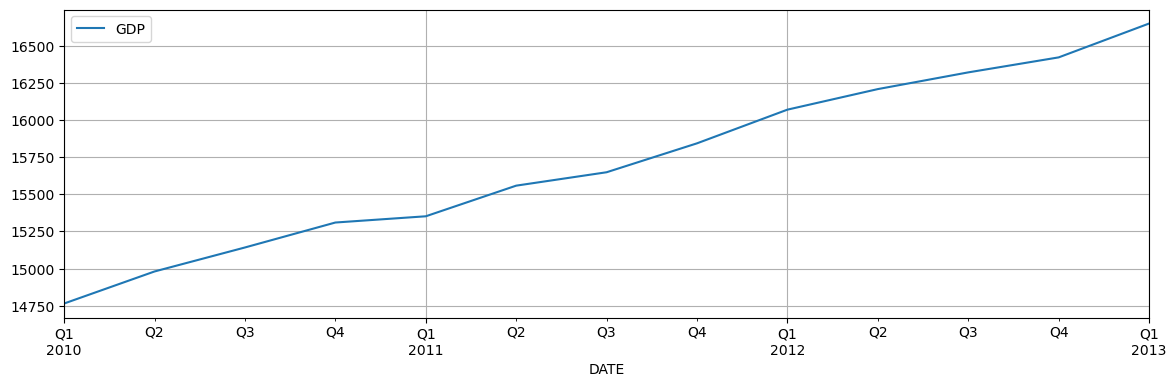

In [264]:
df_gdp.plot()
plt.show()

In [268]:
df_naver = pdr.DataReader('005930', 'naver', start='2010-09-10', end='2024-04-04')
df_naver.info()
# df_naver.close.plot()
# plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3344 entries, 2010-09-10 to 2024-04-04
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Open    3344 non-null   object
 1   High    3344 non-null   object
 2   Low     3344 non-null   object
 3   Close   3344 non-null   object
 4   Volume  3344 non-null   object
dtypes: object(5)
memory usage: 156.8+ KB


AttributeError: 'DataFrame' object has no attribute 'close'

In [270]:
import pandas_datareader.data as web
symbol = 'WIKI/AAPL'  # or 'AAPL.US'
symbol = 'LBMA/SILVER' 
df = web.DataReader(symbol, 'quandl', '2015-01-01', '2015-01-05')
df.loc['2015-01-02']

ValueError: The Quandl API key must be provided either through the api_key variable or through the environmental variable QUANDL_API_KEY.

##### 국제원유가격
* 국제 원유가격을 대표하는 3대유종이 있으며, 생산자와 소비지역이 다르다.
1. 서부 텍사스 중질율(`POILWTIUSDM`) : 국제원유가격을 대표
2. 두바이유(`POILDUBUSDM`) : 한국이 주로 수입(국내물가에 영향)
3. 북해 브렌트유(`POILBREUSDM`) : 북해에서 생상, 유럽과 아프리카에서 소비
4. FRED
   - 서부 텍사스 중질유(WTI Crude): https://fred.stlouisfed.org/series/POILWTIUSDM
   - 
두바이유 (Dubai Crude): https://fred.stlouisfed.org/series/POILDUBUSD
   - 
북해 브렌트유(Brent Crude): https://fred.stlouisfed.org/series/POILBREUSDM

row count = 290


,POILWTIUSDM
DATE,
2023-10-01,85.469091
2023-11-01,77.575455
2023-12-01,72.019524
2024-01-01,74.003043
2024-02-01,77.363810


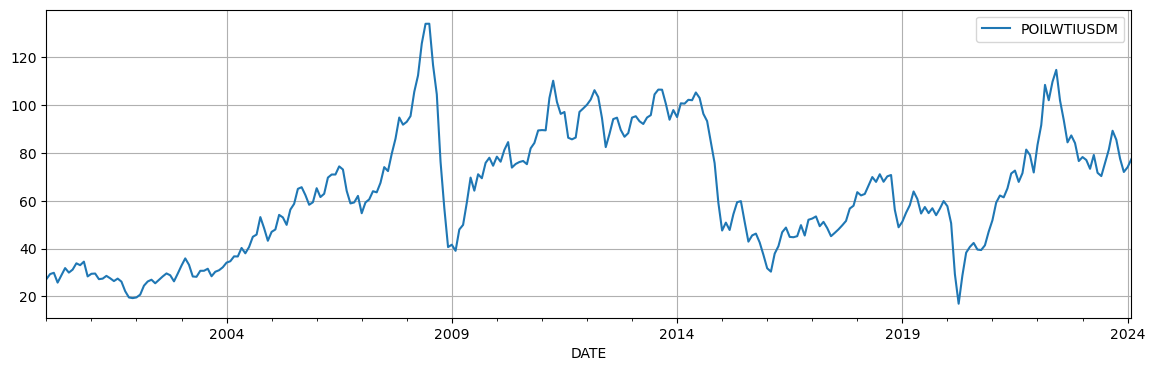

In [275]:
# 1. 서부텍사스중질유(WTI Crude), Monthly
df_wti = pdr.DataReader('POILWTIUSDM', 'fred', start='2000-01-01')
print(f'row count = {len(df_wti)}')
display(df_wti.tail())
df_wti.plot()
plt.show()

row count = 290


,POILDUBUSDM
DATE,
2023-10-01,88.787727
2023-11-01,82.640909
2023-12-01,77.569524
2024-01-01,79.582174
2024-02-01,82.809048


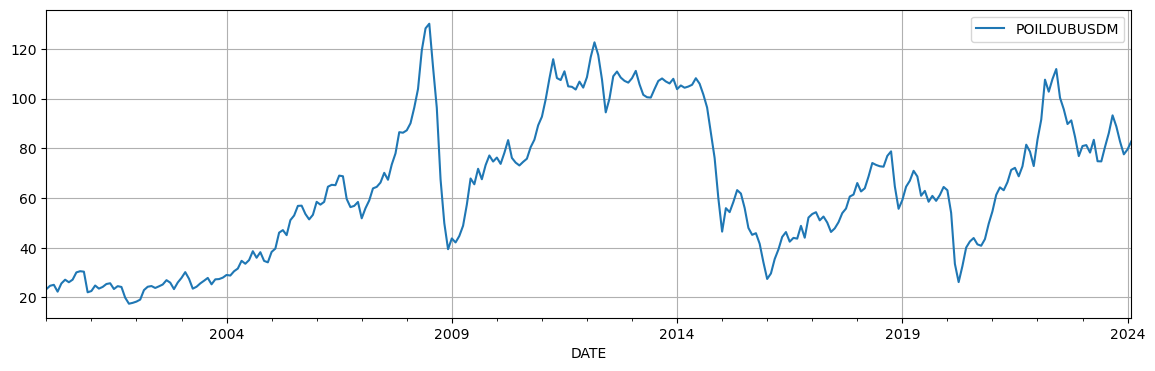

In [276]:
# 2. 두바이유(Dubai Crude), Monthly
df_dubai = pdr.DataReader('POILDUBUSDM', 'fred', start='2000-01-01')
print(f'row count = {len(df_dubai)}')
display(df_dubai.tail())
df_dubai.plot()
plt.show()

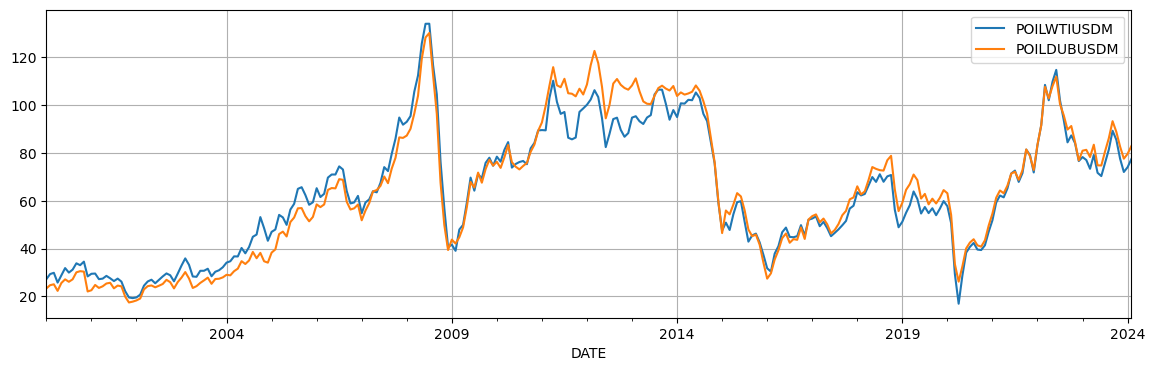

In [278]:
# 3. 2개이상의 유가
df_oil = pdr.DataReader(['POILWTIUSDM', 'POILDUBUSDM'], 'fred', start='2000-01-01')
df_oil.plot()
plt.show()

In [280]:
# 2개의 오일의 가격차이에 대한 시각화
df_oil['diff'] = df_oil['POILDUBUSDM'] - df_oil['POILWTIUSDM']

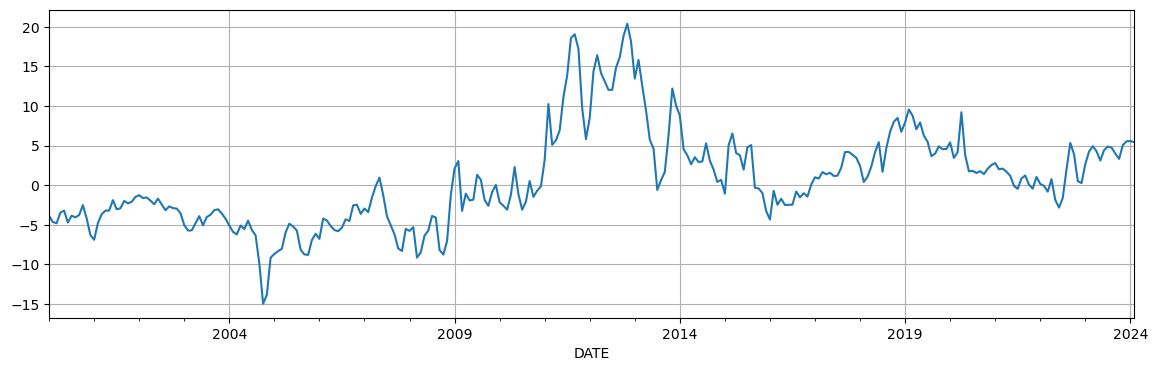

In [282]:
df_oil['diff'].plot()
plt.show()

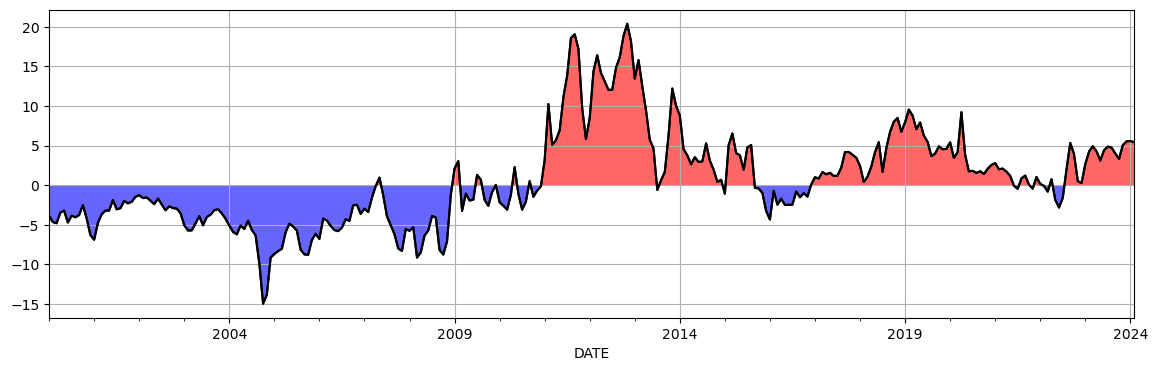

In [284]:
# 가겨차이를 좀더 명확하게 시각화하기
# 0값을 기준으로 낮으면 파란색, 높은 빨간색으로 표시
ax = df_oil['diff'].plot(color='k')
x = df_oil['diff'].plot(color='k')

x = df_oil.index
y =  df_oil['diff']

# interpolate
ax.fill_between(x, 0, y, where=y>0, facecolor='r', alpha=0.6, interpolate=True)
ax.fill_between(x, 0, y, where=y<=0, facecolor='b', alpha=0.6, interpolate=True)
plt.show()